<a href="https://colab.research.google.com/github/alqu7095/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [0]:
survival_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [0]:
survival_data = pd.read_csv(survival_data_url)

In [85]:
print(survival_data.shape)
survival_data.head()

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
column_headers = ['Patient_Age', 'Operation_Year', 'Axiliary_Nodes', 'Survival']
survival_data= pd.read_csv(survival_data_url, names = column_headers)

In [87]:
print(survival_data.shape)
survival_data.head()

(306, 4)


,Patient_Age,Operation_Year,Axiliary_Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [88]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [89]:
survival_data.isnull().sum()

Patient_Age       0
Operation_Year    0
Axiliary_Nodes    0
Survival          0
dtype: int64

In [90]:
survival_data.count()

Patient_Age       306
Operation_Year    306
Axiliary_Nodes    306
Survival          306
dtype: int64

In [91]:
survival_data.dtypes

Patient_Age       int64
Operation_Year    int64
Axiliary_Nodes    int64
Survival          int64
dtype: object

In [0]:
# survival_data.loc[survival_data['Survival'] < 2] = 0
# survival_data.loc[survival_data['Survival'] > 1] = 1

survival_data['Survival'].replace(1,0,inplace=True)

In [0]:
survival_data['Survival'].replace(2,1,inplace=True)

In [121]:
survival_data.head()

,Patient_Age,Operation_Year,Axiliary_Nodes,Survival
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
import numpy as np

In [122]:
pd.crosstab(survival_data['Axiliary_Nodes'], survival_data['Survival'])

Survival,0,1
Axiliary_Nodes,,
0,117,19
1,33,8
2,15,5
3,13,7
4,10,3
5,2,4
6,4,3
7,5,2
8,5,2


In [124]:
survival_data.describe()

,Patient_Age,Operation_Year,Axiliary_Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


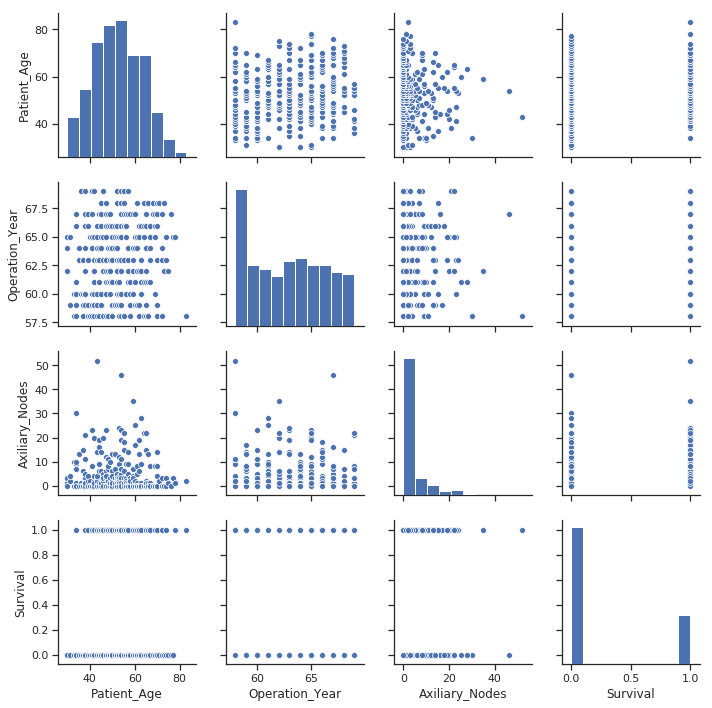

In [125]:
import seaborn as sns
sns.set(style='ticks' , color_codes=True)
graph = sns.pairplot(survival_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


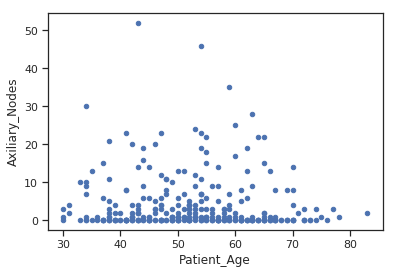

In [126]:
survival_data.plot.scatter('Patient_Age', 'Axiliary_Nodes')

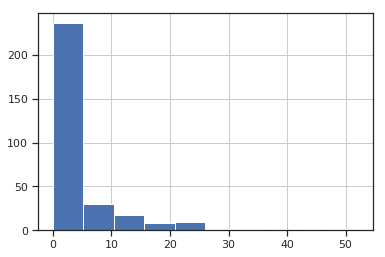

In [127]:
survival_data['Axiliary_Nodes'].hist();

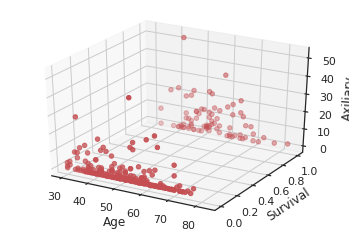

In [128]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

xs = survival_data['Patient_Age']
ys = survival_data['Survival']
zs = survival_data['Axiliary_Nodes']
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Survival')
ax.set_zlabel('Axiliary')

plt.show()


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? Axiliary Nodes, although that's not very clear from the data. Nevertheless there is a correlation between patient age and axiliary nodes that points axiliary nodes could essentially have a positive relationship with survival.
- What is at least one feature that looks to have a negative relationship with survival? Age
- How are those two features related with each other, and what might that mean? The axiliary nodes looks like tend to go down starting near age 60 for the population data. The combination between positive axiliary node relationship with survival, negative patient age relationship with survival, and a negative correlation between both, starting at age 60, could be helpful to better understand breast cancer. This might mean that around age 60 patients' axiliary nodes decrease, therefore the desease could be more lethal.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.